In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load Data

In [3]:
# https://www.kaggle.com/datasets/sandiledesmondmfazi/bank-customer-churn/data
df = pd.read_csv("botswana_bank_customer_churn.csv")

### Check Data and Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   RowNumber                        115640 non-null  int64  
 1   CustomerId                       115640 non-null  object 
 2   Surname                          115640 non-null  object 
 3   First Name                       115640 non-null  object 
 4   Date of Birth                    115640 non-null  object 
 5   Gender                           115640 non-null  object 
 6   Marital Status                   115640 non-null  object 
 7   Number of Dependents             115640 non-null  int64  
 8   Occupation                       115640 non-null  object 
 9   Income                           115640 non-null  float64
 10  Education Level                  115640 non-null  object 
 11  Address                          115640 non-null  object 
 12  Co

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,115640.0,57820.500000,33382.536902,1.00,28910.750,57820.500,86730.2500,115640.00
Number of Dependents,115640.0,2.502923,1.707249,0.00,1.000,3.000,4.0000,5.00
Income,115640.0,52641.363046,27429.756390,5000.96,28857.070,52658.110,76364.1575,99999.51
Customer Tenure,115640.0,15.490591,8.654217,1.00,8.000,15.000,23.0000,30.00
Credit Score,115640.0,574.299775,159.067499,300.00,436.000,574.000,712.0000,850.00
Credit History Length,115640.0,15.546602,8.654630,1.00,8.000,16.000,23.0000,30.00
Outstanding Loans,115640.0,25502.731792,14127.859827,1000.43,13226.060,25505.285,37742.2500,49999.69
Churn Flag,115640.0,0.121878,0.327147,0.00,0.000,0.000,0.0000,1.00
Balance,115640.0,124639.209748,72210.476638,1.06,61991.915,124505.890,187122.9225,249998.91
NumOfProducts,115640.0,2.999274,1.411361,1.00,2.000,3.000,4.0000,5.00


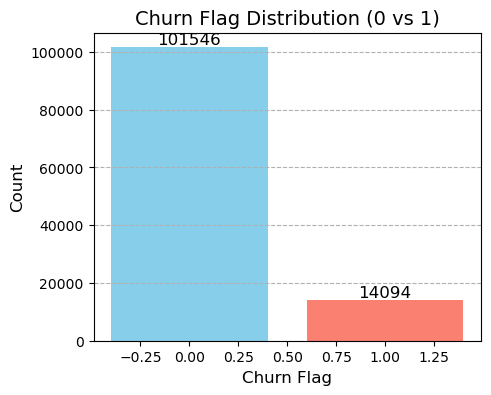

In [7]:
# Count the occurrences of each Churn Flag
churn_counts = df['Churn Flag'].value_counts()

plt.figure(figsize=(5, 4))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontsize=12)  # Add text label

plt.title('Churn Flag Distribution (0 vs 1)', fontsize=14)
plt.xlabel('Churn Flag', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--')  # Add grid lines for better visibility
plt.show()  # Display the plot

In [8]:
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column data type is object
        print(f"Value counts for {col}:")
        print(df[col].value_counts().sort_values(ascending=False))
        print()  # Print a newline for better readability

Value counts for CustomerId:
CustomerId
83ef0b54-35f6-4f84-af58-5653ac0c0dc4    1
52daf603-0a34-4ee2-8e04-6fe371b898b4    1
0d932e5b-bb3a-4104-8c83-f84270f7f2ea    1
c18b027e-b108-4900-b413-dac87e2ee9b5    1
7091e271-7d2b-4e73-934f-8398e2a1dcbc    1
                                       ..
73a64c22-da8f-4c3e-8f62-d92f03636a1e    1
00affc66-75c4-43c4-9019-f28c434b5012    1
1af846ff-7731-4a43-9214-1426c329af7c    1
7a7d7ef6-94b1-46ae-b26d-9291e2de3c26    1
cf2dbdf3-607d-414a-bc14-413dde1c3fc7    1
Name: count, Length: 115640, dtype: int64

Value counts for Surname:
Surname
Smith        2513
Johnson      1965
Williams     1637
Brown        1518
Jones        1424
             ... 
Levy           26
Mcpherson      25
Glass          24
Bonilla        23
Odom           20
Name: count, Length: 1000, dtype: int64

Value counts for First Name:
First Name
Michael     2661
David       1817
James       1777
Jennifer    1674
John        1645
            ... 
Malik         10
Angie          9
Terran

In [9]:
# Extract the state from Adress columns
def extract_zip_code_state(address):
    parts = address.split("\n")
    zip_code_state = parts[1].split(" ")
    return zip_code_state

df['zip_code_state'] = df['Address'].apply(extract_zip_code_state)
df['zip_code'] = df['zip_code_state'].apply(lambda x: x[-1])
df['state'] = df['zip_code_state'].apply(lambda x: x[-2])

In [10]:
# Create the 'Region_West', 'Region_Midwest', 'Region_South', 'Region_Northeast' columns: 1 if the state is in corresponding list, otherwise 0

western_states = ['WA', 'OR', 'CA', 'ID', 'NV', 'WY', 'UT', 'AZ', 'CO', 'NM', 'AK']
midwest_states = ['ND','SD','NE','KS','MN','IA','MO','WI','IL','IN','MI','OH']
south_states = ['TX','OK','AR','LA','KY','TN','MS','AL','WV','DE','MD','DC','VA','NC','SC','GA','FL', 'PR']
northeast_states = ['ME','VT','NH','MA','CT','RI','NY','PA','NJ']

df['Region_West'] = df['state'].apply(lambda x: 1 if x in western_states else 0)
df['Region_Midwest'] = df['state'].apply(lambda x: 1 if x in midwest_states else 0)
df['Region_South'] = df['state'].apply(lambda x: 1 if x in south_states else 0)
df['Region_Northeast'] = df['state'].apply(lambda x: 1 if x in northeast_states else 0)

In [11]:
from datetime import datetime
# Transform the objest datatype to datetime. and claculate age for each datapoint
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

currentdate = datetime.strptime('2024-08-07', '%Y-%m-%d')

# Calculate the age by subtracting the year and adjusting for whether the birthday has occurred yet this year
df['age'] = currentdate.year - df['Date of Birth'].dt.year

In [12]:
# Drop the redundant columns
df = df.drop(['RowNumber','CustomerId','Surname','First Name','Occupation','Contact Information','Churn Reason','Churn Date', 'Address', 'zip_code', 'state', 'zip_code_state', 'Date of Birth'], axis=1)

In [13]:
# Binary Encoding
binary_encode_cols = {
    'Gender': {'Female': 1, 'Male': 0},
    'Preferred Communication Channel': {'Email': 1, 'Phone': 0},
}

for col, mapping in binary_encode_cols.items():
    df[col] = df[col].map(mapping)

In [14]:
#One-Hot Encoding
one_hot_cols = ['Marital Status', 'Education Level', 'Customer Segment']

# One-hot encode data
df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

### Train test split and SMOTE¶

In [16]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [17]:
# Separate features and target
X = df_encoded.drop(['Churn Flag'], axis=1)
y = df_encoded['Churn Flag']

In [18]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Class distribution before SMOTE:", Counter(y_train))

Class distribution before SMOTE: Counter({0: 71082, 1: 9866})


In [19]:
# Initiate the SMOTE
smote = SMOTE(random_state=55688)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({1: 71082, 0: 71082})


### Modeling

In [21]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import SelectFromModel

In [22]:
# Train LightGBM with 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=55688)
model = lgb.LGBMClassifier()


# Initialize an empty list to store the feature importance across folds
feature_importance = np.zeros(X_resampled.shape[1])

for train_index, val_index in kf.split(X_resampled):
    X_fold_train, X_fold_val = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
    y_fold_train, y_fold_val = y_resampled.iloc[train_index], y_resampled.iloc[val_index]
    
    model.fit(
        X_fold_train, 
        y_fold_train, 
        eval_set=[(X_fold_val, y_fold_val)], 
        eval_metric='logloss',
        callbacks=[lgb.early_stopping(stopping_rounds=10), lgb.log_evaluation(0)]
    )
    
    # Add feature importances
    feature_importance += model.feature_importances_

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 63909, number of negative: 64038
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 127947, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499496 -> initscore=-0.002016
[LightGBM] [Info] Start training from score -0.002016
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0174762
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 63962, numbe

In [76]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# Define the list of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LGBoost": lgb.LGBMClassifier()
}

# Initialize a dictionary to store average accuracy results
results = {}

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Train and evaluate each model
for name, model in models.items():
    acc_list = []
    print(f"⏳ Training model: {name}")
    
    for train_idx, val_idx in kf.split(X_resampled):
        X_train, X_val = X_resampled.iloc[train_idx], X_resampled.iloc[val_idx]
        y_train, y_val = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        acc = accuracy_score(y_val, y_pred)
        acc_list.append(acc)
    
    avg_acc = np.mean(acc_list)
    results[name] = avg_acc
    print(f"✅ Model {name} - Average Accuracy: {avg_acc:.4f}")

# Print the summary of results
print("\n📊 Cross-Validation Accuracy for All Models:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

⏳ Training model: Logistic Regression


C:\Users\kkiwi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kkiwi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

✅ Model Logistic Regression - Average Accuracy: 0.9610
⏳ Training model: Random Forest
✅ Model Random Forest - Average Accuracy: 0.9882
⏳ Training model: CatBoost
✅ Model CatBoost - Average Accuracy: 0.9972
⏳ Training model: XGBoost


C:\Users\kkiwi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:26:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kkiwi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:26:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kkiwi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:26:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kkiwi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:26:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

✅ Model XGBoost - Average Accuracy: 0.9964
⏳ Training model: LGBoost
✅ Model LGBoost - Average Accuracy: 0.9954

📊 Cross-Validation Accuracy for All Models:
Logistic Regression: 0.9610
Random Forest: 0.9882
CatBoost: 0.9972
XGBoost: 0.9964
LGBoost: 0.9954


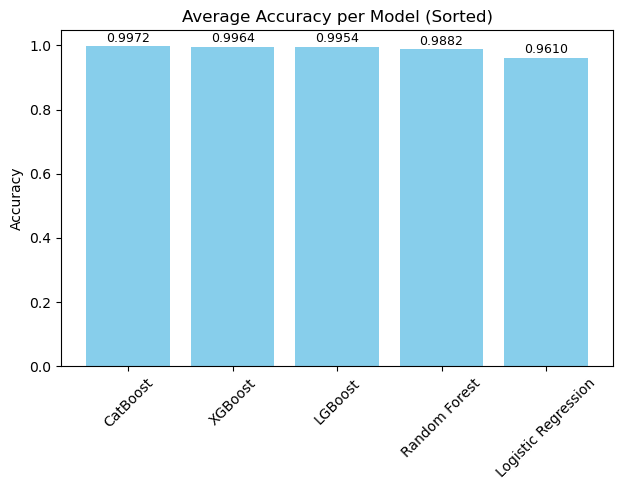

In [84]:
import matplotlib.pyplot as plt

# Sort results by accuracy (descending)
sorted_results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))

# Create the figure
plt.figure(figsize=(12, 5))

# Accuracy Bar Chart
plt.subplot(1, 2, 1)
bars = plt.bar(sorted_results.keys(), sorted_results.values(), color='skyblue')
plt.xticks(rotation=45)
plt.title('Average Accuracy per Model (Sorted)')
plt.ylabel('Accuracy')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f'{height:.4f}',
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
plt.show()

In [24]:
# Average feature importance across folds
feature_importance /= 10

# 6. Feature Selection
# Use SelectFromModel to select features based on importance
selector = SelectFromModel(model, threshold='mean', prefit=True)
selected_features = selector.get_support(indices=True)


# Get the names of selected features from the one-hot encoded DataFrame
selected_feature_names = X_resampled.columns[selected_features].tolist()

In [86]:
# Train Final Model on Entire Training Data
# final_model = lgb.LGBMClassifier() 
final_model = CatBoostClassifier(verbose=0)

# Fit the model using early stopping and verbose via callbacks
final_model.fit(
    X_resampled[selected_feature_names], 
    y_resampled,
) 

            Feature  Importance
1           Balance   33.502160
3     NumComplaints   23.446834
2     NumOfProducts   21.798453
0      Credit Score   21.015521
4  Region_Northeast    0.237032


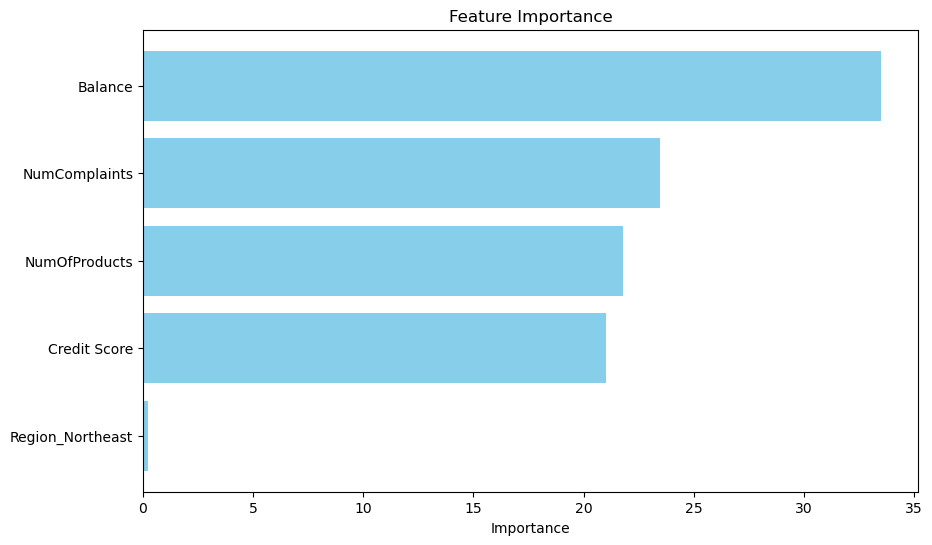

In [88]:
# Print out feature importance
importance = final_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)

# Optionally, plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
predictions = final_model.predict(X_test[selected_feature_names])
binary_predictions = (predictions >= 0.5).astype(int)
auc_score = roc_auc_score(y_test, binary_predictions)
print("ROC-AUC score is ",auc_score)

ROC-AUC score is  0.9926322764205021


In [29]:
print (classification_report(y_test, binary_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     30464
           1       0.93      1.00      0.96      4228

    accuracy                           0.99     34692
   macro avg       0.97      0.99      0.98     34692
weighted avg       0.99      0.99      0.99     34692



In [30]:
from sklearn.model_selection import GridSearchCV

lgb_model = lgb.LGBMClassifier(verbose=-1)

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50],                     # Fewer choices
    'max_depth': [-1, 10],                       # Fewer choices
    'learning_rate': [0.01, 0.1],                # Fewer choices
    'n_estimators': [100, 200],                  # Fewer choices
    'subsample': [0.8, 1.0],                     # Fewer choices
    'colsample_bytree': [0.8, 1.0],              # Fewer choices
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',  # You can change to 'f1', 'roc_auc', etc. depending on your task
                           cv=3,                # Number of cross-validation folds
                           verbose=1,          # Print progress
                           n_jobs=-1)          # Use all available cores

# Fit the grid search model
grid_search.fit(X_resampled[selected_feature_names], 
    y_resampled)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Optionally, you can evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test[selected_feature_names], y_test)
print("Test Set Score:", test_score)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.8}
Best Cross-Validation Score: 0.9934793618637631
Test Set Score: 0.992764902571198


### Visualiztion

Churn Rate by Balance Bin:
  Balance Bin  Churn Rate
0         Low    0.446939
1      Medium    0.040574
2        High    0.000000
3   Very High    0.000000


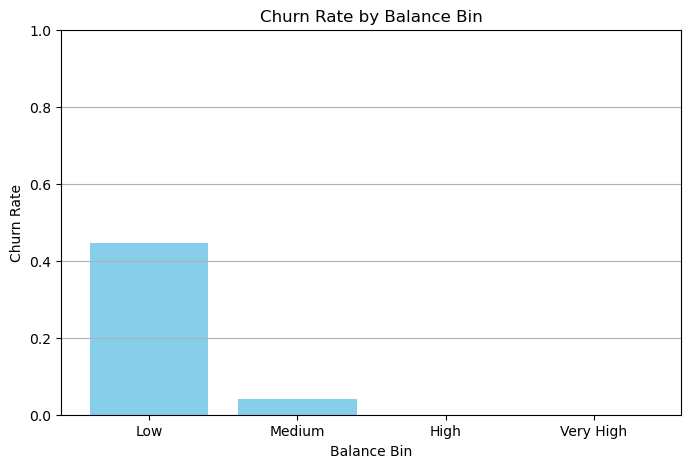

In [32]:
# Define bins based on the provided statistics
bins = [0, 61991.915, 124505.890, 187122.9225, 249998.91]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column for binned balances
df['Balance_Bin'] = pd.cut(df['Balance'], bins=bins, labels=labels, include_lowest=True)

# Display the counts for each bin
bin_counts = df['Balance_Bin'].value_counts().sort_index()
churn_rate = df.groupby('Balance_Bin', observed=False)['Churn Flag'].mean().reset_index()

# Rename columns for clarity
churn_rate.columns = ['Balance Bin', 'Churn Rate']

# Display the churn rates for each bin
print("Churn Rate by Balance Bin:")
print(churn_rate)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(churn_rate['Balance Bin'], churn_rate['Churn Rate'], color='skyblue')
plt.title('Churn Rate by Balance Bin')
plt.xlabel('Balance Bin')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)  # Set y-axis limit for churn rate (0 to 1)
plt.grid(axis='y')
plt.show()

Churn Rate by Credit Score Bin:
  Credit Score Bin  Churn Rate
0              Low    0.227468
1           Medium    0.204470
2             High    0.142664
3        Very High    0.091292


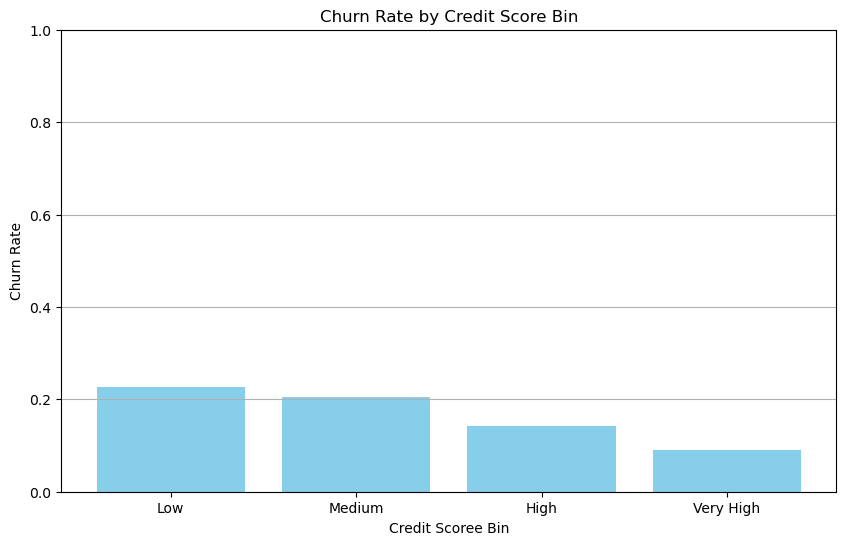

In [33]:
# Define bins based on the provided statistics
bins = [0, 300.00, 436.000, 574.000, 712.0000]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column for binned balances
df['CS_Bin'] = pd.cut(df['Credit Score'], bins=bins, labels=labels, include_lowest=True)

# Display the counts for each bin
bin_counts = df['CS_Bin'].value_counts().sort_index()
churn_rate = df.groupby('CS_Bin', observed=False)['Churn Flag'].mean().reset_index()

# Rename columns for clarity
churn_rate.columns = ['Credit Score Bin', 'Churn Rate']

# Display the churn rates for each bin
print("Churn Rate by Credit Score Bin:")
print(churn_rate)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(churn_rate['Credit Score Bin'], churn_rate['Churn Rate'], color='skyblue')
plt.title('Churn Rate by Credit Score Bin')
plt.xlabel('Credit Scoree Bin')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)  # Set y-axis limit for churn rate (0 to 1)
plt.grid(axis='y')
plt.show()

Churn Rate by NumOfProducts Bin:
  NumOfProducts Bin  Churn Rate
0               Low    0.208665
1            Medium    0.164215
2              High    0.113975
3         Very High    0.078487


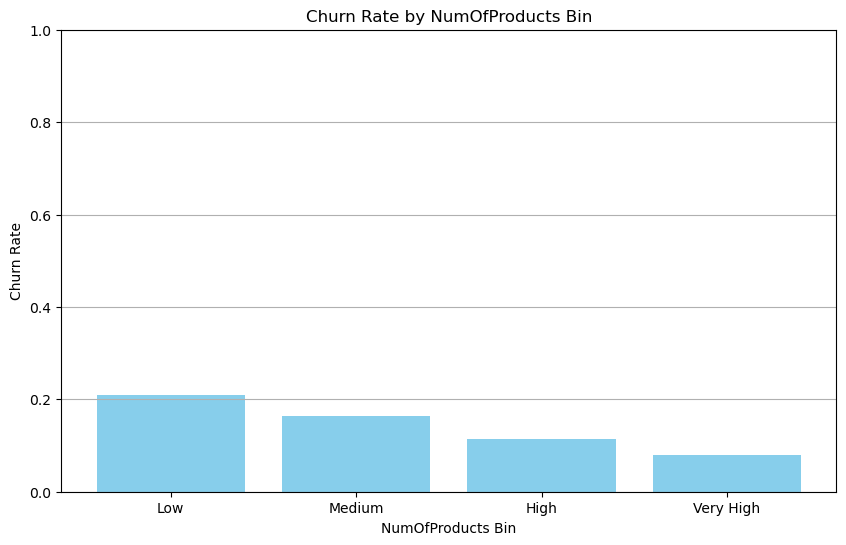

In [34]:
# Define bins based on the provided statistics
bins = [0, 1, 2, 3, 4]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column for binned balances
df['NumOfProducts_Bin'] = pd.cut(df['NumOfProducts'], bins=bins, labels=labels, include_lowest=True)

# Display the counts for each bin
bin_counts = df['NumOfProducts_Bin'].value_counts().sort_index()
churn_rate = df.groupby('NumOfProducts_Bin', observed=False)['Churn Flag'].mean().reset_index()

# Rename columns for clarity
churn_rate.columns = ['NumOfProducts Bin', 'Churn Rate']

# Display the churn rates for each bin
print("Churn Rate by NumOfProducts Bin:")
print(churn_rate)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(churn_rate['NumOfProducts Bin'], churn_rate['Churn Rate'], color='skyblue')
plt.title('Churn Rate by NumOfProducts Bin')
plt.xlabel('NumOfProducts Bin')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)  # Set y-axis limit for churn rate (0 to 1)
plt.grid(axis='y')
plt.show()

Churn Rate by NumComplaints Bin:
  NumComplaints Bin  Churn Rate
0               Low    0.041983
1            Medium    0.093701
2              High    0.162356
3         Very High    0.224627


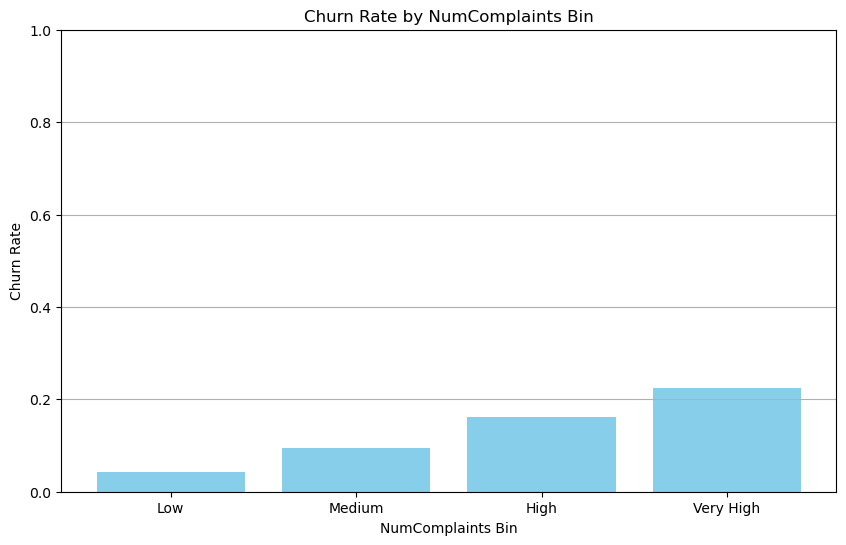

In [35]:
# Define bins based on the provided statistics
bins = [0, 2, 5, 8, 10]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column for binned balances
df['NumComplaints_Bin'] = pd.cut(df['NumComplaints'], bins=bins, labels=labels, include_lowest=True)

# Display the counts for each bin
bin_counts = df['NumComplaints_Bin'].value_counts().sort_index()
churn_rate = df.groupby('NumComplaints_Bin', observed=False)['Churn Flag'].mean().reset_index()

# Rename columns for clarity
churn_rate.columns = ['NumComplaints Bin', 'Churn Rate']

# Display the churn rates for each bin
print("Churn Rate by NumComplaints Bin:")
print(churn_rate)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(churn_rate['NumComplaints Bin'], churn_rate['Churn Rate'], color='skyblue')
plt.title('Churn Rate by NumComplaints Bin')
plt.xlabel('NumComplaints Bin')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)  # Set y-axis limit for churn rate (0 to 1)
plt.grid(axis='y')
plt.show()